In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import matplotlib.patches as patches
import math

In [29]:
ds = xr.open_dataset('ClimProjAll.nc')

In [30]:
test = ds.isel(site=0).groupby('time.year').mean().to_dataframe()
yr_2017 = 2017-1950

In [31]:
ds.isel(site=0).groupby('time.year').std()

<xarray.Dataset>
Dimensions:  (year: 151)
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 ...
Data variables:
    vpd      (year) float64 0.1526 0.1627 0.1597 0.153 0.1539 0.1657 0.1515 ...
    tmax     (year) float64 2.563 2.56 2.493 2.484 2.453 2.554 2.577 2.404 ...
    tmin     (year) float64 3.149 2.985 3.053 3.025 3.022 3.022 3.134 2.815 ...
    tavg     (year) float64 2.762 2.665 2.655 2.653 2.632 2.674 2.766 2.52 ...

In [32]:
site_data.sel(time=slice('2050-01-01','2050-12-01'))

<xarray.Dataset>
Dimensions:  (gcm: 13, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2050-01-01 2050-02-01 2050-03-01 ...
    site     <U6 'VU-Coc'
Dimensions without coordinates: gcm
Data variables:
    vpd      (time, gcm) float64 0.2734 0.2615 0.3049 0.2811 0.2813 0.2992 ...
    tmax     (time, gcm) float64 28.27 27.98 28.56 28.74 28.69 29.21 28.49 ...
    tmin     (time, gcm) float64 25.67 25.46 25.68 26.12 26.07 26.48 25.66 ...
    tavg     (time, gcm) float64 26.97 26.72 27.12 27.43 27.38 27.85 27.07 ...
Attributes:
    actual_time_unit:  months since 1950-01-01

In [33]:
#colors for sites
colors = cm.rainbow(np.linspace(0, 1, 13))


In [34]:
#for the loop
site_num = len(ds['site'])
sites = np.arange(0,site_num,1)

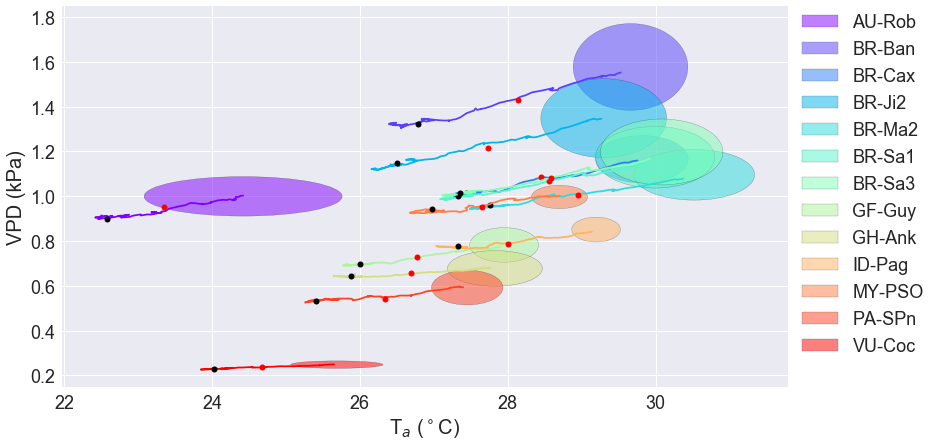

In [35]:
#create figure
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fig1.set_size_inches(13,7)

#set axis bounds to see all data
ax1.set_xbound(lower=21,upper=33)
ax1.set_ybound(lower=0, upper=2)
#set labls
ax1.set_xlabel('Tavg')
ax1.set_ylabel('VPD')
#array of sites
sites = np.arange(0,len(ds['site']),1)
#get index for 2017
yr_2017 = 2017-1950

for i in sites:
    
    #grab each site
    site_data = ds.isel(site=i)
    ##Line Plot/Points
    #grab yearly averages, gcm also averaged
    year_avg = ds.isel(site=i).groupby('time.year').mean()
    year_std = ds
    #grab time frame for line plot
    year_avg = year_avg.sel(year=slice('1950-01-01','2050-01-01'))
    #change to pandas dataframe for use of 'rolling' command
    year_avg = year_avg.to_dataframe()
    
    ##Ovals
    #time frame for 1st oval
    site_data_past = site_data.sel(time=slice('1950-01-01','1999-12-01'))
    #time frame for 2nd oval
    site_data_future = site_data.sel(time=slice('2050-01-01','2050-12-01'))
    
    #calculate regression of future time frame for arrow
    #slope, intercept, r_value, p_value, std_err = stats.linregress(site_data_future.mean('gcm')['tavg'],site_data_future.mean('gcm')['vpd'])
    #calc standard deviation of future time frame
    future_std = site_data_future.std()
    #calc sigma for past time frame
    past_std = site_data_past.std()
    #Calculate means for future and past time frame
    future_mean = site_data_future.mean()
    past_mean = site_data_past.mean()

    
    #Calculate 95%CI for 'past' time frame
    
    ###No longer using the CI interval, using standard deviation instead
    
    #vpd_interval = stats.norm.interval(0.95, loc=0, scale=past_std['vpd']/np.sqrt(site_num))
    #tavg_interval = stats.norm.interval(0.95, loc=0, scale=past_std['tavg']/np.sqrt(site_num))
    #calculate 95%CI for 'future' time frame
    #vpd_interval_future = stats.norm.interval(0.95, loc=0, scale=future_std['vpd']/np.sqrt(site_num))
    #tavg_interval_future = stats.norm.interval(0.95, loc=0, scale=future_std['tavg']/np.sqrt(site_num))
    
    #extracting variables of interest from 'past'
    tavg_mean = past_mean['tavg']
    vpd_mean = past_mean['vpd']
    
    #extracting variables of interest form 'future'
    tavg_future_mean = future_mean['tavg']
    vpd_future_mean = future_mean['vpd']
    
    ##Line and Point Plotting
    #plot 5 year window average
    ax1.plot(year_avg['tavg'].rolling(window=5).mean(),year_avg['vpd'].rolling(window=5).mean(),color=colors[i], label='_nolegend_')
    #plot year 1 on the plot
    ax1.plot(year_avg.iloc[1]['tavg'],year_avg.iloc[1]['vpd'],marker='.',color='black',markersize=12)
    #plot 2017 on plot
    ax1.plot(year_avg.iloc[yr_2017]['tavg'],year_avg.iloc[yr_2017]['vpd'],marker='.',color='red',markersize=12)
    

    ##Oval Plotting
    
    ax1.add_patch(
        patches.Ellipse(
            (tavg_future_mean, vpd_future_mean),   # (x,y)
            future_std['tavg'],          # width
            future_std['vpd'],        #height
            label=ds['site'].values[i],
            facecolor=colors[i],
            #angle=math.degrees(slope),
            alpha=.5,
            edgecolor='black'
        )
    )
#plot parameters
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=18)
#plt.title('VPD, Tavg : 1950-2050', size=)
ax1.set_xlabel(r'T$_a$ ($^\circ$C)', size=20)
ax1.set_ylabel('VPD (kPa)', size=20)
ax1.tick_params(labelsize=18)
#save figure
plt.savefig('trop_synth_balloons_2050.png', dpi=450, bbox_inches='tight')

